In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv("C:/Users/Eddison/Downloads/titanic-221202-102205.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


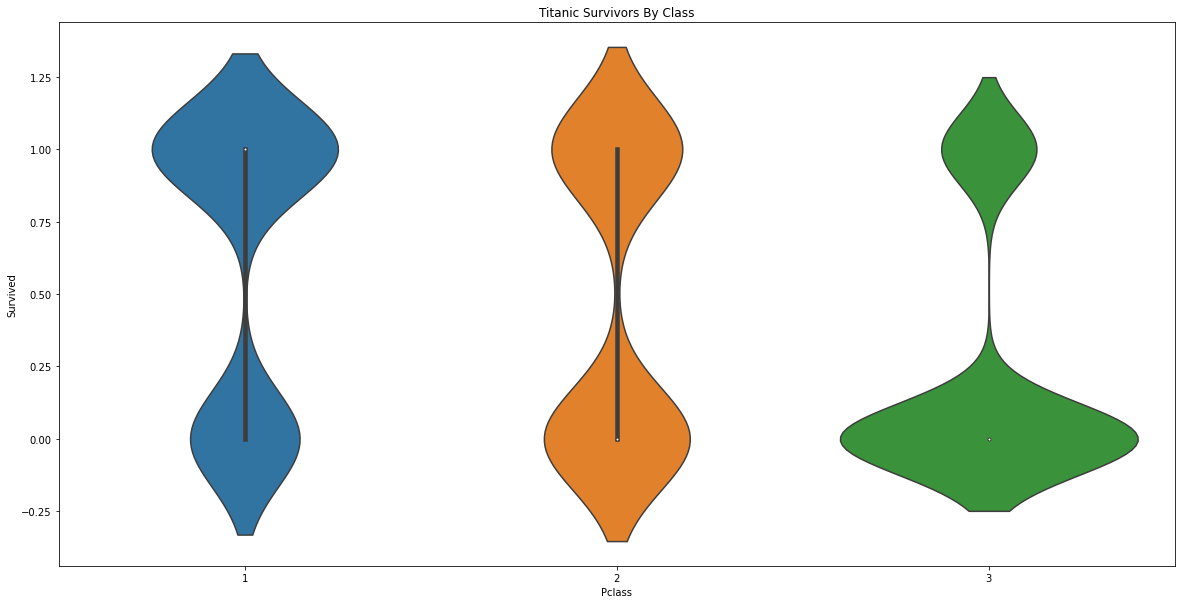

In [94]:
plt.figure(figsize=[20,10])
sns.violinplot(x="Pclass", y="Survived", data=df).set_title("Titanic Survivors By Class")
plt.show()

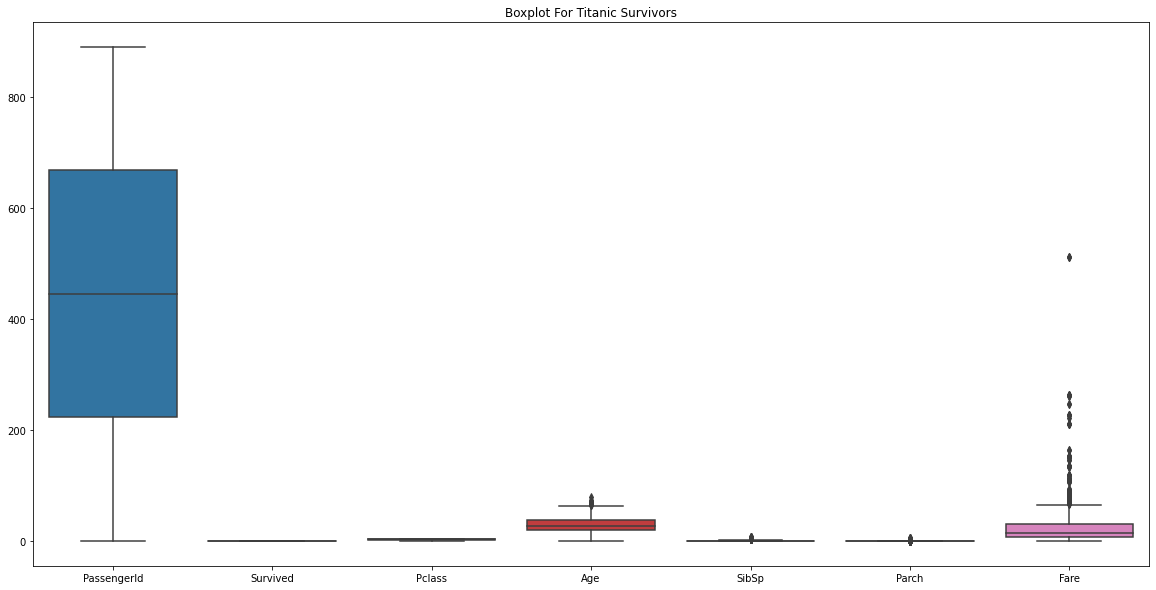

In [95]:
plt.figure(figsize=[20,10])
sns.boxplot(data = df).set_title("Boxplot For Titanic Survivors")
plt.show()

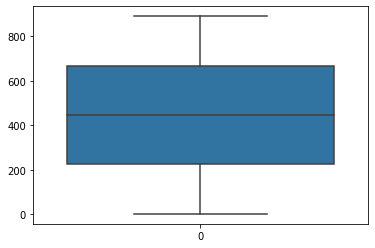

In [96]:
sns.boxplot( data=df["PassengerId"])
plt.show()

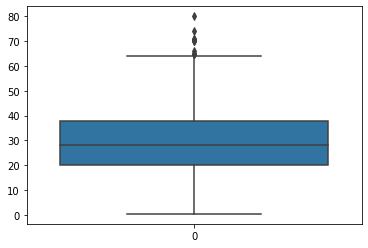

In [97]:
sns.boxplot(data= df["Age"])
plt.show()

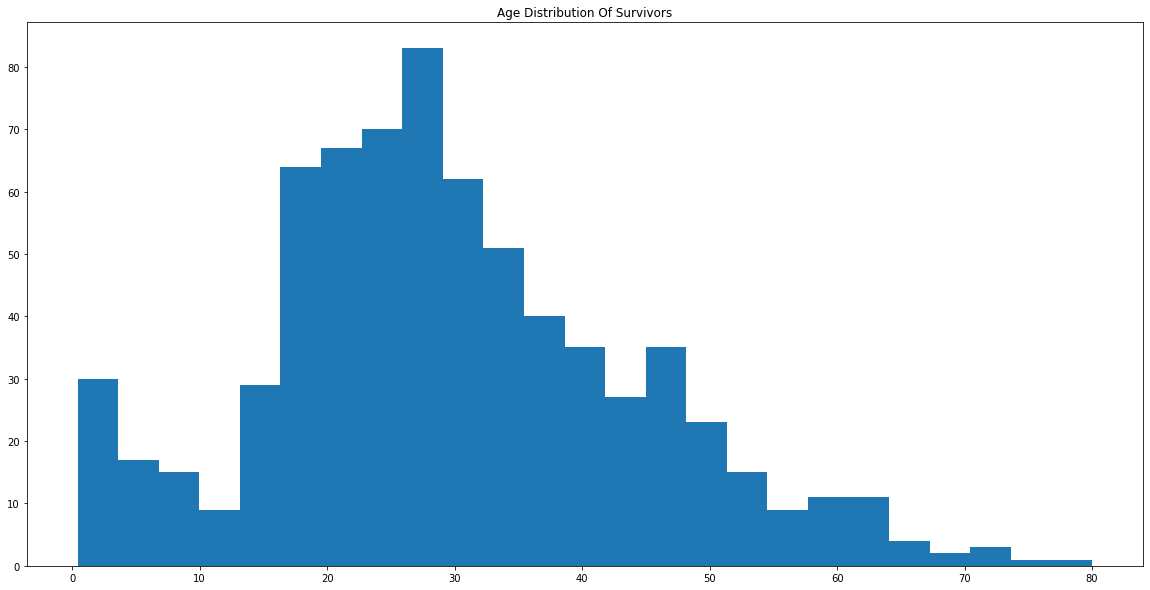

In [98]:
plt.figure(figsize=[20,10])
plt.hist(x="Age",data=df, bins= 25)
plt.title("Age Distribution Of Survivors")
plt.show()

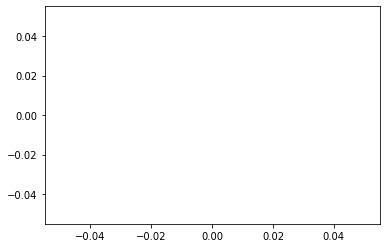

In [99]:
#Needs a second eye
plt.plot(kind= "kde",data=df["Survived"])
plt.show()

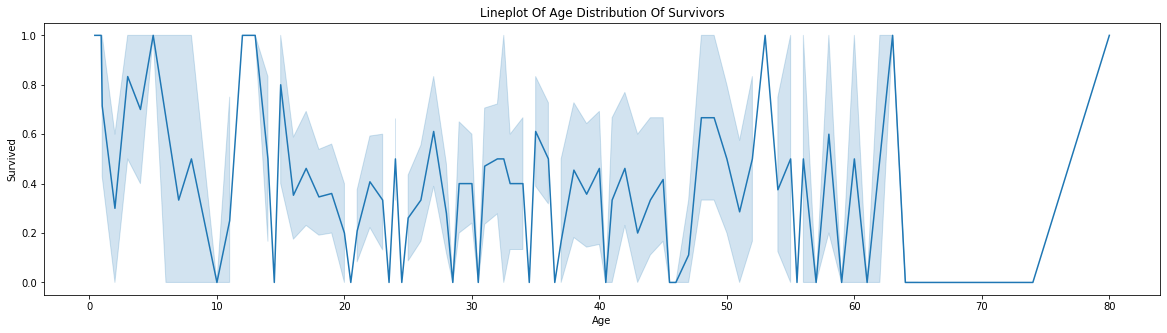

In [100]:
plt.figure(figsize=[20,5])
sns.lineplot(x="Age",y="Survived", data=df).set_title("Lineplot Of Age Distribution Of Survivors")
plt.show()

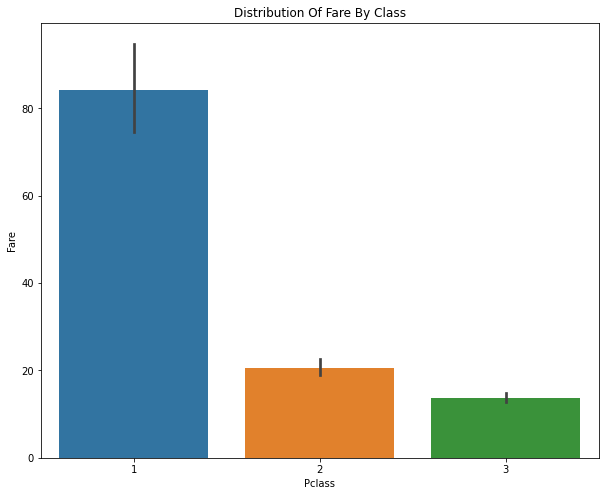

In [101]:
plt.figure(figsize=[10,8])
sns.barplot(x="Pclass", y="Fare", data= df).set_title("Distribution Of Fare By Class")
plt.show()

In [102]:
bin=[-1,10,17,60,99]
label=["Child","Teenager","Adult","Elderly"]

In [103]:
df["Age Cat."] =pd.cut(df["Age"], bin, labels=label)
df.set_index("PassengerId", inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Cat.
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [122]:
df["Survived"].value_counts()



0    549
1    342
Name: Survived, dtype: int64

In [123]:
a=df.groupby("Age Cat.")["Survived"].count()
a

Age Cat.
Child        64
Teenager     49
Adult       579
Elderly      22
Name: Survived, dtype: int64

In [125]:
totaldf["Survived"].count()

891

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

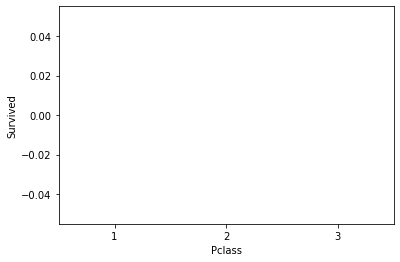

In [124]:
#Needs a second eye
sns.barplot(x="a" , y=, data=df)

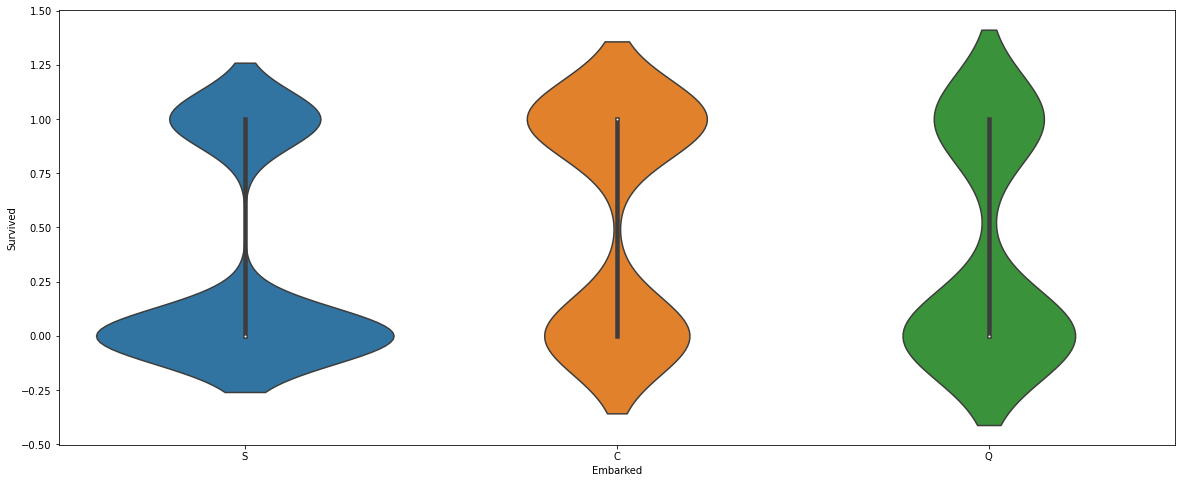

In [108]:
plt.figure(figsize=[20,8])
sns.violinplot(x="Embarked", y="Survived", data=df)
plt.show()

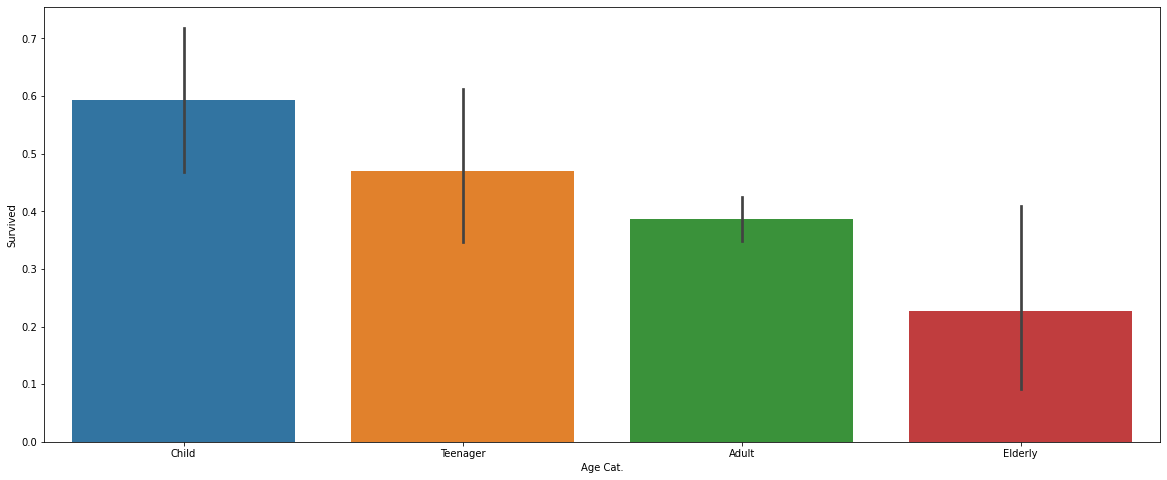

In [109]:
plt.figure(figsize=[20,8])
sns.barplot(x="Age Cat.", y="Survived", data=df)
plt.show()

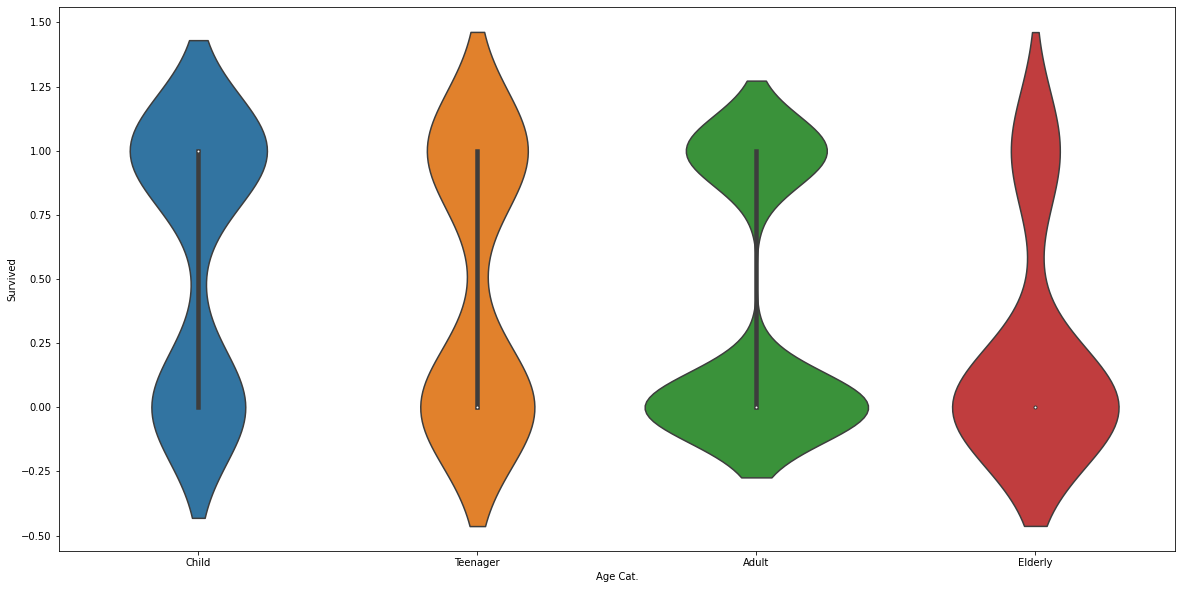

In [110]:
plt.figure(figsize=[20,10])
sns.violinplot(x="Age Cat.", y="Survived", data=df)
plt.show()

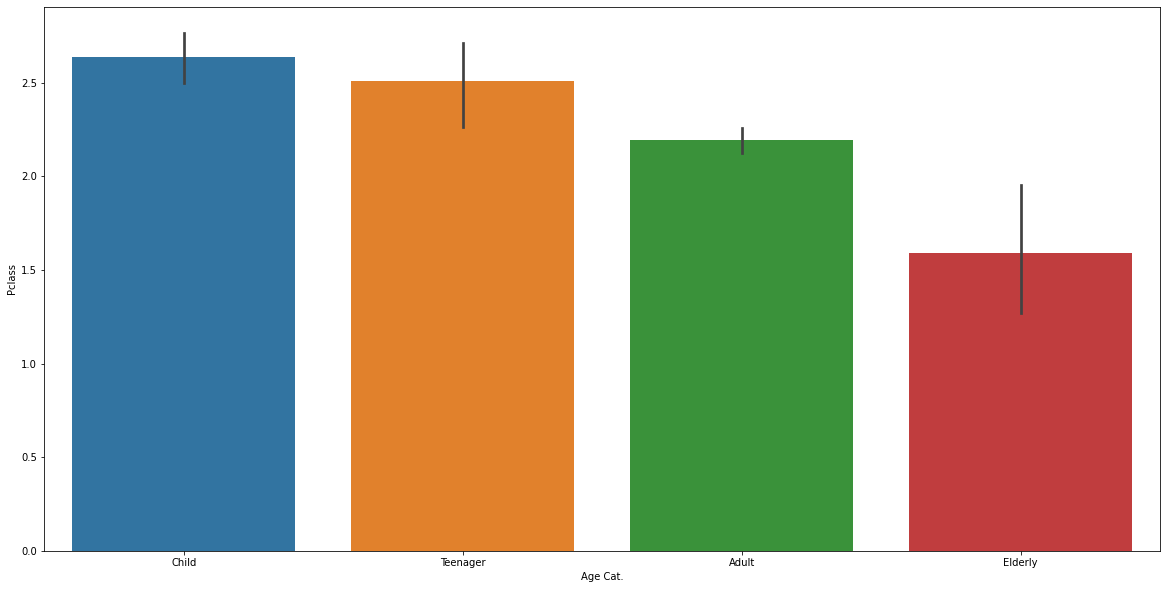

In [111]:
plt.figure(figsize=[20,10])
sns.barplot(x="Age Cat.", y="Pclass", data=df)
plt.show()